In [154]:
#Import all needed libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
#Extract the .h5 file
f1 = h5py.File('/content/sample_data/train_catvnoncat.h5', 'r')
f2 = h5py.File('/content/sample_data/test_catvnoncat.h5', 'r')

1


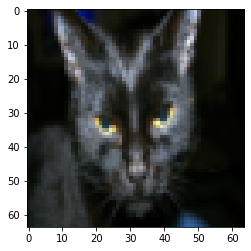

In [156]:
#Train dataset
x_train = np.int32(f1['train_set_x'][:])
y_train = np.int32(f1['train_set_y'][:])
plt.imshow(x_train[25])
print(y_train[25])

1


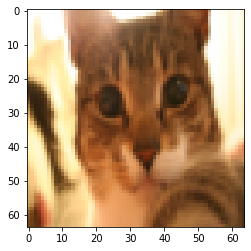

In [157]:
#test dataset
x_test = np.int32(f2['test_set_x'][:])
y_test = np.int32(f2['test_set_y'][:])
plt.imshow(x_test[11])
print(y_test[11])

In [158]:
#Normalize dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [159]:
#Flatten the image
def Flatten(image):
  flatten = image.reshape(image.shape[1]*image.shape[2]*image.shape[3],image.shape[0])
  return flatten

dataset = Flatten(x_train)

In [160]:
dataset.shape[0]

12288

In [161]:
#Sigmoid Function
def sigmoid(x):
  activation = 1/(1 + np.exp(-x))
  return activation

In [162]:
act = sigmoid(np.array([[1,2],[3,4]]))
print(act)

[[0.73105858 0.88079708]
 [0.95257413 0.98201379]]


In [163]:
#Binary Cross Entropy
def BinaryCrossEntropy(train_dataset, y, activation):
  eq = (y*(np.log(activation)) + (1-y)*(np.log(1-activation)));
  sum = np.sum(eq)
  loss = -(sum)/train_dataset
  return loss

In [164]:
BinaryCrossEntropy(100, 3, act)

-0.19493073021947258

In [165]:
#Initialize Parameters
def parameters(dimensions):

  w = np.zeros((dimensions,1));
  b = 0

  return w,b

In [166]:
w, b = parameters(4)

In [167]:
#Forward & Backward Propagation
def Forward_Backward_Propagation(weights, labels, inputs, training_dataset, bias):

  #forward propagation
  Z = np.dot(weights.T, inputs) + bias
  A = sigmoid(Z)
  L = BinaryCrossEntropy(training_dataset, labels, A)

  #backward propagation
  dw = (1/training_dataset)*np.dot(inputs, (A - labels).T)
  db = (1/training_dataset)*np.sum((A - labels))

  derivatives = {"dw":dw, "db":db}

  return derivatives, L

In [168]:
#Optimizers Update Parameters
def Gradient_Descent(weights, labels, inputs, training_dataset, bias, lr, epochs):

  costs = []

  for i in range(epochs):

    derivatives, loss = Forward_Backward_Propagation(weights, labels, inputs, training_dataset, bias)
    dw = derivatives["dw"]
    db = derivatives["db"]

    #update parameters
    weights = weights - lr*dw
    bias = bias - lr*db

    costs.append(loss)

    print("Cost after "+str(i)+" iteration is "+str(loss))

  parameters = {"w":weights, "b":bias}
  gradient_des = {"dw":dw, "db":db}

  return parameters, gradient_des, costs

In [169]:
#Finally Run the Model
def Model(dimensions, labels, training_dataset, lr, epochs, inputs):

  w, b = parameters(dimensions)

  parameter, gradient_des, costs = Gradient_Descent(w, labels, inputs, training_dataset, b, lr, epochs)

  return parameter, gradient_des, costs

In [170]:
dim = dataset.shape[0]
dataset1 = dataset.shape[1]
params, derivatives, costs = Model(dim, y_train, dataset1, 0.005, 2000, dataset)

Cost after 0 iteration is 0.6931471805599453
Cost after 1 iteration is 0.7740269600349212
Cost after 2 iteration is 0.8187778064141167
Cost after 3 iteration is 1.0430562390327909
Cost after 4 iteration is 0.7934466910901119
Cost after 5 iteration is 1.0024286096751625
Cost after 6 iteration is 0.8001615069696302
Cost after 7 iteration is 1.0147356686329287
Cost after 8 iteration is 0.7874451701325488
Cost after 9 iteration is 0.9924497347726101
Cost after 10 iteration is 0.7883415411450959
Cost after 11 iteration is 0.9923725512308287
Cost after 12 iteration is 0.7817144185162106
Cost after 13 iteration is 0.9789998888332622
Cost after 14 iteration is 0.7802604258001924
Cost after 15 iteration is 0.973987593059319
Cost after 16 iteration is 0.7763510810536467
Cost after 17 iteration is 0.9647199513958888
Cost after 18 iteration is 0.7741849651299456
Cost after 19 iteration is 0.9583178747681803
Cost after 20 iteration is 0.7713997862926903
Cost after 21 iteration is 0.9509493163920086

In [171]:
#Prediction on dataset
def Prediction(params, td):

  w = params['w']
  b = params['b']
  
  Results = np.zeros((1,td.shape[1]))
    
  A = sigmoid(np.dot(w.T, td) + b) 
    
  for i in range(A.shape[1]):
    if A[0,i] > 0.5:
      Results[0][i] = 1
    else:
      Results[0][i] = 0
      
  return Results, A

In [172]:
predictions, A = Prediction(params, dataset)
predictions

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])